# 项目分析目的
* 通过预测用户能给公司带来的收益指导运营成本的投入，从而提升ROI。在这个具体项目中，我们尝试通过使用用户刚开始使用产品前三个月的R，F，M值来预估用户在接下来的一年中为项目带来的总收益，在决策运营成本的投入时，就可以参考这个预测。

# 数据清洗及构建数据集
* 原始数据集构成
    * 不同日期下每个产品的销量，单价，用户id（可重复），以及下单用户所在城市
* 数据清洗
    * 修改日期的数据类型方便后面按照日期分类
    * 去除首尾日期中零散的日期，避免计算每月总gmv时首位日期在当月分布不完整，影响整体分布
* 构建数据集
    * 根据销售数据，计算出每个用户刚开始使用产品前三个月的的R，F，M值

In [1]:
import numpy as np # 导入NumPy
import pandas as pd # 导入Pandas
df_sales = pd.read_csv('电商历史订单.csv') # 导入数据集
df_sales # 输出数据

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市
0,536374,21258,6/1/2020 9:09,绿联usb分线器 一拖四,32,10.5,15100,北京
1,536376,22114,6/1/2020 9:32,加大男装T恤男大码胖子宽松卡,48,50.0,15291,上海
2,536376,21733,6/1/2020 9:32,热销 零基础学机器学习 经典AI入门教程,64,89.0,15291,上海
3,536378,22386,6/1/2020 9:37,越南进口白心火龙果4个装,10,108.0,14688,北京
4,536378,85099C,6/1/2020 9:37,大连美早樱桃400g 果径约26mm,10,166.0,14688,北京
...,...,...,...,...,...,...,...,...
87175,581585,21684,6/9/2021 12:31,苹果快充6s充电线器正品通用ipad,12,5.0,15804,深圳
87176,581585,22398,6/9/2021 12:31,华为太空人表盘惊爆价促销限3天,12,499.0,15804,深圳
87177,581585,23328,6/9/2021 12:31,优衣库U家2022夏装新款男装,4,58.0,15804,深圳
87178,581585,23145,6/9/2021 12:31,唐装男夏季青年棉麻中国风加肥,12,88.9,15804,深圳


In [2]:
df_sales['总价'] = df_sales['数量'] * df_sales['单价'] # 计算每单的总价

In [3]:
print('日期范围: %s ~ %s' % (df_sales['消费日期'].min(), df_sales['消费日期'].max())) # 输出日期范围（格式转换前）

日期范围: 1/1/2021 10:11 ~ 9/9/2020 9:20


In [4]:
df_sales['消费日期'] = pd.to_datetime(df_sales['消费日期']) # 转换日期格式
print('日期范围: %s ~ %s' % (df_sales['消费日期'].min(), df_sales['消费日期'].max()))# 输出日期范围

日期范围: 2020-06-01 09:09:00 ~ 2021-06-09 12:31:00


In [5]:
df_sales_3m = df_sales[(df_sales. 消费日期 > '2020-06-01') & (df_sales. 消费日期 <= '2020-08-30')] # 构建仅含前3 个月数据的数据集
df_sales_3m.reset_index(drop=True) # 重置索引

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市,总价
0,536374,21258,2020-06-01 09:09:00,绿联usb分线器 一拖四,32,10.50,15100,北京,336.00
1,536376,22114,2020-06-01 09:32:00,加大男装T恤男大码胖子宽松卡,48,50.00,15291,上海,2400.00
2,536376,21733,2020-06-01 09:32:00,热销 零基础学机器学习 经典AI入门教程,64,89.00,15291,上海,5696.00
3,536378,22386,2020-06-01 09:37:00,越南进口白心火龙果4个装,10,108.00,14688,北京,1080.00
4,536378,85099C,2020-06-01 09:37:00,大连美早樱桃400g 果径约26mm,10,166.00,14688,北京,1660.00
...,...,...,...,...,...,...,...,...,...
14837,545190,22937,2020-08-29 15:32:00,懒人神器厨房轻松剪12CM,6,18.00,15656,苏州,108.00
14838,545190,22722,2020-08-29 15:32:00,天气预报瓶风暴瓶黑科技,4,39.50,15656,苏州,158.00
14839,545190,22457,2020-08-29 15:32:00,金属色气球2.8g婚房婚礼生日求婚告白布置,60,3.00,15656,苏州,180.00
14840,545190,22464,2020-08-29 15:32:00,弟子规圣人训消防员要牢记大字卡不割手,12,25.00,15656,苏州,300.00


In [6]:
df_user_LTV = pd.DataFrame(df_sales_3m['用户码'].unique()) # 生成以“用户码”为主键的对象
df_user_LTV.columns = ['用户码'] # 设定字段名
df_user_LTV # 输出数据

,用户码
0,15100
1,15291
2,14688
3,15311
4,15862
...,...
365,15951
366,14745
367,15724
368,15874


In [7]:
df_R_value = df_sales_3m.groupby('用户码'). 消费日期.max().reset_index() # 找到每个用户的最近消费日期，构建df_R_value 对象
df_R_value.columns = ['用户码','最近购买日期'] # 设定字段名
df_R_value['R值'] = (df_R_value['最近购买日期'].max() - df_R_value['最近购买日期']).dt.days # 计算最新日期与上次消费日期间的天数
df_user_LTV = pd.merge(df_user_LTV, df_R_value[['用户码','R值']], on='用户码') # 把上次消费日期距最新日期的天数（R 值）整合至df_user 对象中

In [8]:
df_F_value = df_sales_3m.groupby('用户码'). 消费日期.count().reset_index() # 计算每个用户的消费次数，构建df_F_value 对象
df_F_value.columns = ['用户码','F值'] # 设定字段名
df_user_LTV = pd.merge(df_user_LTV, df_F_value[['用户码','F值']], on='用户码') # 把消费频率(F 值)整合至df_user 对象中

In [9]:
df_M_value = df_sales_3m.groupby('用户码').总价.sum().reset_index() # 计算每个用户前3 个月的消费总额，构建df_M_value 对象
df_M_value.columns = ['用户码','M值'] # 设定字段名
df_user_LTV = pd.merge(df_user_LTV, df_M_value, on='用户码') # 把消费总额（M 值）整合至df_user对象中

In [10]:
df_user_LTV.head() # 输出df_user_LTV 的前几行数据

,用户码,R值,F值,M值
0,15100,45,6,620.70
1,15291,35,35,9097.15
2,14688,6,85,8023.78
3,15311,5,718,12730.01
4,15862,89,64,354.23


In [11]:
df_user_1y = df_sales.groupby('用户码')['总价'].sum().reset_index() # 计算每个用户的整年消费总额，构建df_user_1y 对象
df_user_1y.columns = ['用户码','年度LTV'] # 设定字段名
df_user_1y.head() # 输出前几行数据

,用户码,年度LTV
0,14681,498.95
1,14682,52.00
2,14684,1236.28
3,14687,628.38
4,14688,11658.88


In [12]:
df_LTV = pd.merge(df_user_LTV, df_user_1y, on='用户码', how='left') # 计算整体LTV，训练数据集
df_LTV # 输出df_LTV

,用户码,R值,F值,M值,年度LTV
0,15100,45,6,620.70,620.70
1,15291,35,35,9097.15,12363.71
2,14688,6,85,8023.78,11658.88
3,15311,5,718,12730.01,59419.34
4,15862,89,64,354.23,832.88
...,...,...,...,...,...
365,15951,1,22,375.17,669.57
366,14745,1,7,240.60,1167.16
367,15724,0,5,103.65,212.30
368,15874,0,5,584.35,4330.67


# 搭建模型
1. 构建训练集和测试集
    * 将数据集拆分成特征集和标签集
    * 通过train_test_split构建训练集和测试集
2. 通过scikit-learn中的回归模块，使用训练集训练模型
3. 通过R^2指标，对比模型在训练集和测试集上的表现，评估模型的精度和泛化能力

In [13]:
X = df_LTV.drop(['用户码','年度LTV'],axis=1) # 特征集
X.head() # 输出特征集

,R值,F值,M值
0,45,6,620.70
1,35,35,9097.15
2,6,85,8023.78
3,5,718,12730.01
4,89,64,354.23


In [14]:
y = df_LTV['年度LTV'] # 标签集
y.head() #输出标签集

0      620.70
1    12363.71
2    11658.88
3    59419.34
4      832.88
Name: 年度LTV, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split #导入train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7) #拆分训练集和测试集

In [16]:
from sklearn.linear_model import LinearRegression #导入线性回归模块
model = LinearRegression() #创建线性回归模型

In [17]:
model.fit(X_train, y_train) #拟合模型

LinearRegression()

In [18]:
model.fit(X_train, y_train) #拟合模型

LinearRegression()

In [19]:
y_train_preds =  model.predict(X_train) # 用模型预测训练集
y_test_preds = model.predict(X_test) # 用模型预测测试集

In [20]:
X_test.iloc[2] # 随机选择一行数据

R值     83.00
F值     64.00
M值    521.69
Name: 80, dtype: float64

In [21]:
y_test_preds[2] #模型预测值

1228.2114426497087

In [22]:
y_test.iloc[2] #实际值

1384.6799999999998

In [23]:
from sklearn.metrics import r2_score, median_absolute_error #导入Sklearn评估模块
print('训练集上的R平方分数: %0.4f' % r2_score(y_true=y_train, y_pred=y_train_preds))
print('测试集上的R平方分数: %0.4f' % r2_score(y_true=y_test, y_pred=y_test_preds))

训练集上的R平方分数: 0.6686
测试集上的R平方分数: 0.2990


Text(0.5, 1.0, ' 实际值与预测值')

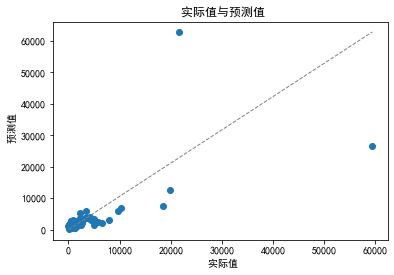

In [25]:
import matplotlib.pyplot as plt # 导入Matplotlib 的pyplot 模块
plt.rcParams["font.family"]=['SimHei'] #用来设定字体样式
plt.rcParams['font.sans-serif']=['SimHei'] #用来设定无衬线字体样式
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.scatter(y_test, y_test_preds) # 预测值和实际值的散点图
plt.plot([0, max(y_test)], [0, max(y_test_preds)], color='gray', lw=1, linestyle='--') # 绘图
plt.xlabel(' 实际值') #x 轴
plt.ylabel(' 预测值') #y 轴
plt.title(' 实际值与预测值') # 标题

# Todo
* 思考如何结合RFM值，更有效地分配运营成本？
    * 如何分层？分几层？是根据RFM值来聚类分层吗还是RFM三个值各自分类用户
* 尝试使用其他算法根据用户的RFM预测用户的LTV